In [2]:
# Read the dataframe of recorded GTFS data
import geopandas as gpd
from shapely.wkt import loads
import pandas as pd

# Convert to geopandas df
df = pd.read_csv("gtfs_record.csv")
df["geometry"] = df["geometry"].apply(loads)
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs='4326')

In [3]:
selected_route = 24433
route = gdf[gdf["route_id"] == selected_route]

In [4]:
# Filter out erroneous points 
ATL_BOUNDS = {
    "minx": -84.89,  # Western boundary
    "maxx": -83.7,  # Eastern boundary
    "miny": 33.2,   # Southern boundary
    "maxy": 34.499999999    # Northern boundary
}
gdf = gdf.cx[ATL_BOUNDS["minx"]:ATL_BOUNDS["maxx"], ATL_BOUNDS["miny"]:ATL_BOUNDS["maxy"]]

In [5]:
# Map MARTA's bus stop inventory
stops = gpd.read_file("stops_inbounds.geojson")

# Select the stops that are within a buffer of the route
bounds = route.total_bounds
selected_stops = stops.cx[bounds[0]:bounds[2], bounds[1]:bounds[3]]

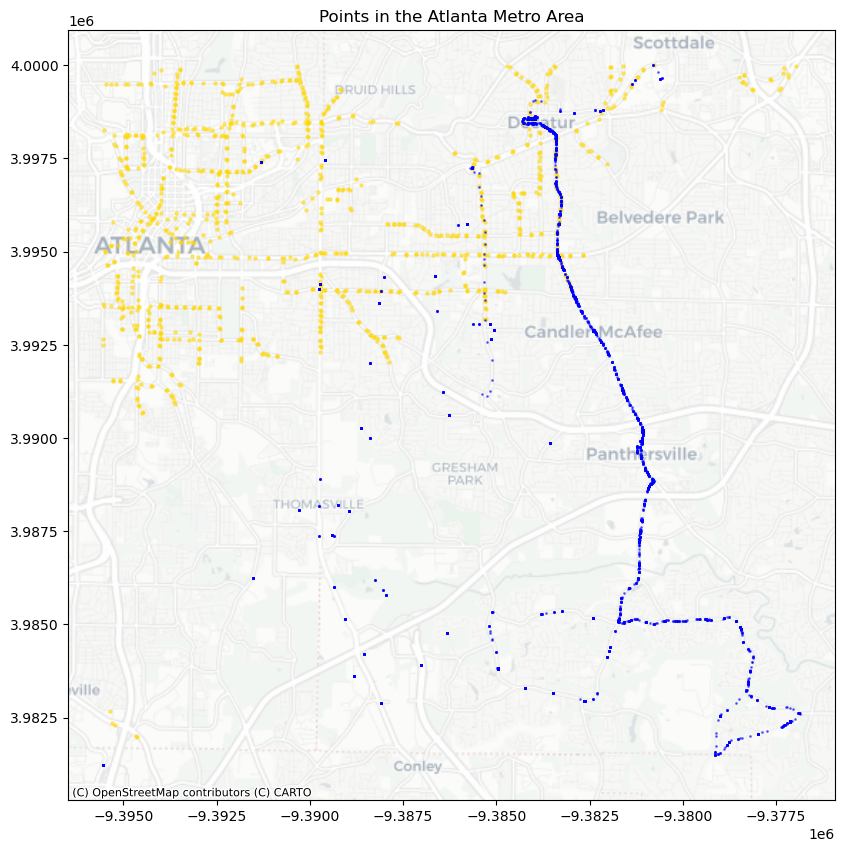

In [6]:
import matplotlib.pyplot as plt
import contextily as ctx

# Plot the points with reduced marker size and alpha transparency
fig, ax = plt.subplots(figsize=(10, 10))

# Convert to web mercantile
gdf = gdf.to_crs(epsg=3857)
stops = stops.to_crs(epsg=3857)
route = route.to_crs(epsg=3857)
selected_stops = selected_stops.to_crs(epsg=3857)

# Plot stops and bus
selected_stops.plot(ax=ax, markersize=5, alpha=.5, color="gold", marker="o")
route.plot(ax=ax, markersize=1, alpha=0.5, color='blue')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.8)
ax.set_title("Points in the Atlanta Metro Area")
plt.show()